In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('ggplot')

In [2]:
def concatinate_data(list_file_name, folder_path = './data/'):
    df = pd.DataFrame()

    for file_name in list_file_name:
        df_cat = pd.read_csv(folder_path + file_name)
        df_cat['DateCollected'] = pd.to_datetime(file_name.replace('.csv', ''), dayfirst=True)

        df = pd.concat([df, df_cat], axis=0)
    df = df.reset_index()
    df = df.drop(columns={'index'})
    return df

In [3]:
from os import listdir

files = [datetime.strptime(f.replace('.csv', ''), '%d-%m-%Y') for f in listdir('./data/')]

three_newest_days = sorted(files)
df = concatinate_data(map(lambda date: date.strftime("%d-%m-%Y") + '.csv', three_newest_days))

In [4]:
datetime.strptime('26-02-2023', "%d-%m-%Y")   

datetime.datetime(2023, 2, 26, 0, 0)

# The World

In [5]:
world_data = df[df['Country,Other'] == 'World']
world_data

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,DateCollected
0,World,679742243,75340.0,6798879.0,296.0,652512495.0,104956.0,20430869.0,87205.0,872.2,0.0,0.0,0.0,All,2023-02-26
232,World,679865129,112273.0,6799716.0,705.0,652669816.0,157321.0,20395597.0,87220.0,872.3,0.0,0.0,0.0,All,2023-02-27
464,World,680068046,128801.0,6801130.0,655.0,652820630.0,149957.0,20446286.0,87246.0,872.5,0.0,0.0,0.0,All,2023-02-28
696,World,680261711,143685.0,6802334.0,767.0,653004808.0,173193.0,20454569.0,87271.0,872.7,0.0,0.0,0.0,All,2023-03-01
928,World,680435562,116376.0,6804035.0,722.0,653196665.0,141028.0,20434862.0,87294.0,872.9,0.0,0.0,0.0,All,2023-03-02
1160,World,680537978,102416.0,6804654.0,619.0,653341863.0,145198.0,20391461.0,87307.0,873.0,0.0,0.0,0.0,All,2023-03-03
1392,World,680589815,51837.0,6804875.0,221.0,653412707.0,70844.0,20372233.0,87313.0,873.0,0.0,0.0,0.0,All,2023-03-04


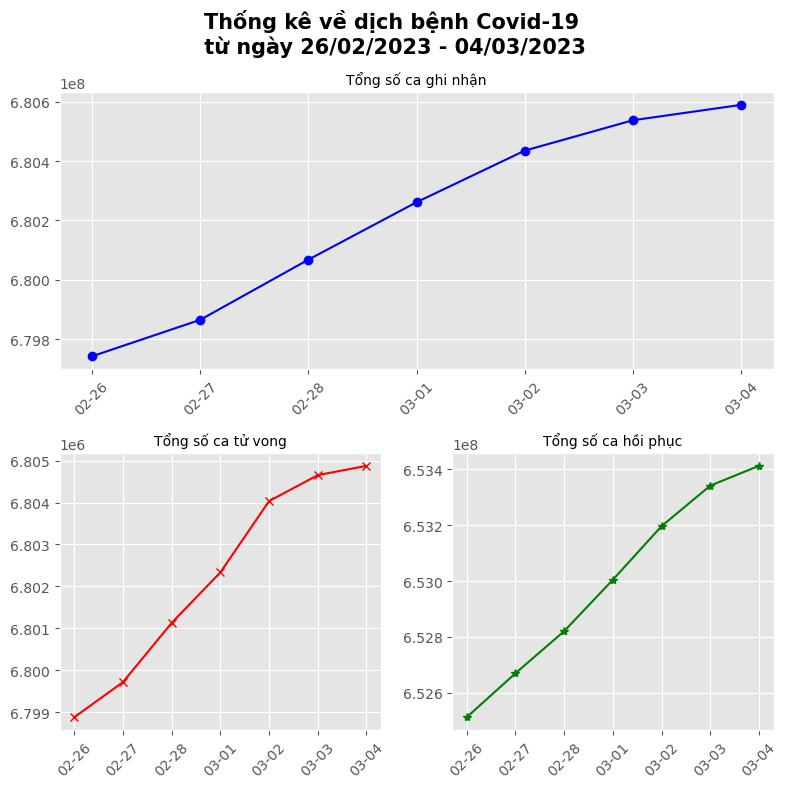

In [6]:
fig = plt.figure()
gs = fig.add_gridspec(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)


ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

ax1.plot(world_data['DateCollected'], world_data['TotalCases'], color='blue', marker='o',)
ax2.plot(world_data['DateCollected'], world_data['TotalDeaths'], color='red', marker='x')
ax3.plot(world_data['DateCollected'], world_data['TotalRecovered'], color='green', marker='*')

for ax in [ax1, ax2, ax3]:
    labels = world_data['DateCollected'].dt.strftime('%m-%d')

    ax.set_ylim(bottom=None)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(labels=labels, rotation=45);

ax1.set_title('Tổng số ca ghi nhận', fontsize=10)
ax2.set_title('Tổng số ca tử vong',  fontsize=10)
ax3.set_title('Tổng số ca hồi phục', fontsize=10)

min_dt, max_dt = world_data['DateCollected'].min(), world_data['DateCollected'].max()
fig.suptitle(f'Thống kê về dịch bệnh Covid-19 \n từ ngày {min_dt.strftime("%d/%m/%Y")} - {max_dt.strftime("%d/%m/%Y")} ', fontsize=15, fontweight="bold")
fig.tight_layout()
# fig

Trend --> Tổng số ghi nhận tăng đều tương đối chậm, số ca tử vong tăng nhanh, số ca hồi phục tăng nhanh

## 2. Continent

In [7]:
countries_df = df[(df['Country,Other'] != 'World') & (df['Continent'] != '0')]
continent_df = countries_df.groupby(['DateCollected', 'Continent']).sum(numeric_only =True).reset_index(level=[0, 1])
continent_df['Tot Cases/1M pop'] = continent_df['TotalCases'] / continent_df['Population'] * 10**6
continent_df['Deaths/1M pop'] = continent_df['TotalDeaths'] / continent_df['Population'] * 10**6
continent_df['TotalRecovered/1M pop'] = continent_df['TotalRecovered'] / continent_df['Population'] * 10**6
continent_df.head()

,DateCollected,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,TotalRecovered/1M pop
0,2023-02-26,Africa,12792192,766.0,258577.0,1.0,10956539.0,26.0,364186.0,9093.574049,183.814400,1.103003e+08,10896465.0,1.406729e+09,7788.665048
1,2023-02-26,Asia,214254266,36094.0,1536304.0,146.0,182087172.0,55400.0,13472303.0,45476.128400,326.085260,2.373277e+09,92821011.0,4.711357e+09,38648.563543
2,2023-02-26,Australia/Oceania,13994994,1301.0,26110.0,5.0,13776098.0,1190.0,67445.0,321943.010059,600.638485,8.855240e+07,20810364.0,4.347041e+07,316907.492564
3,2023-02-26,Europe,246170589,26377.0,2016458.0,69.0,241656057.0,27649.0,2216782.0,329305.890592,2697.444484,2.823573e+09,212828842.0,7.475438e+08,323266.737065
4,2023-02-26,North America,124553800,6734.0,1610998.0,47.0,119602007.0,17285.0,2438122.0,208234.876880,2693.341915,1.303705e+09,101363029.0,5.981409e+08,199956.237403


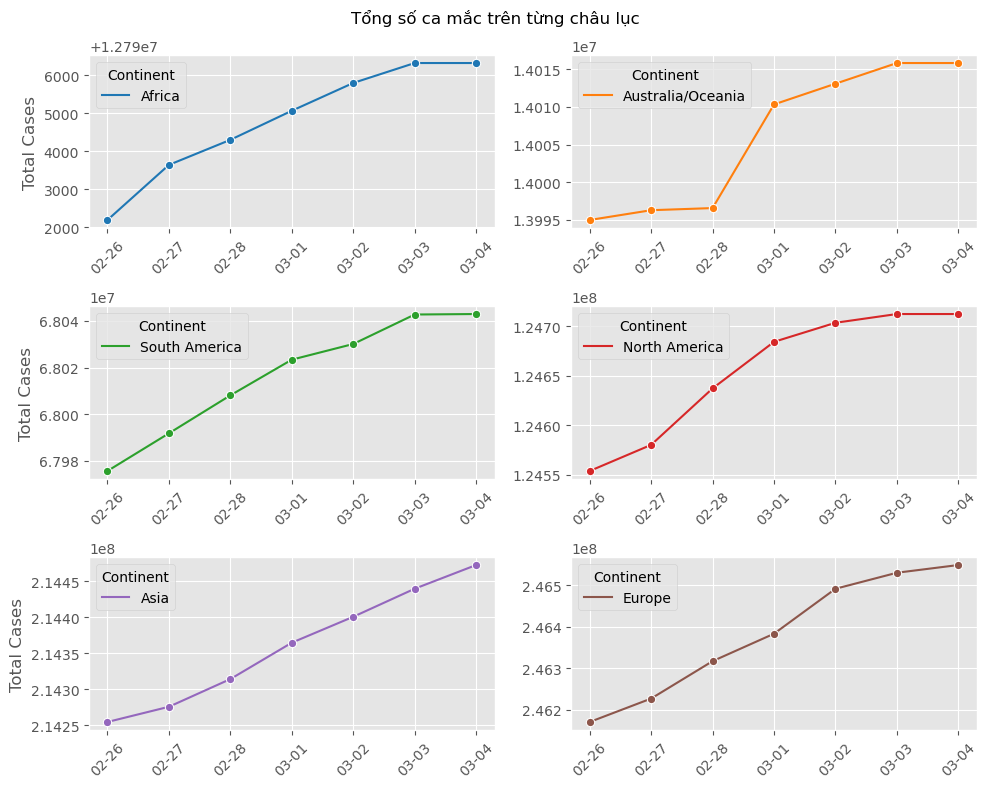

In [8]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

color = sns.color_palette("tab10")
for i, continent in enumerate(continent_df.sort_values('TotalCases')['Continent'].unique()):
    ax = fig.add_subplot(3, 2, i + 1)

    sns.lineplot(x='DateCollected', 
                 y='TotalCases', 
                 hue='Continent', 
                 data=continent_df[continent_df['Continent'] == continent], 
                 marker="o", 
                 palette=[color[i]],
                 ax=ax)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(labels=labels, rotation=45)
    
    if (i + 1) % 2 == 0: ax.set(xlabel='', ylabel='')
    else: ax.set(xlabel='', ylabel='Total Cases')

fig.suptitle('Tổng số ca mắc trên từng châu lục')
fig.tight_layout()

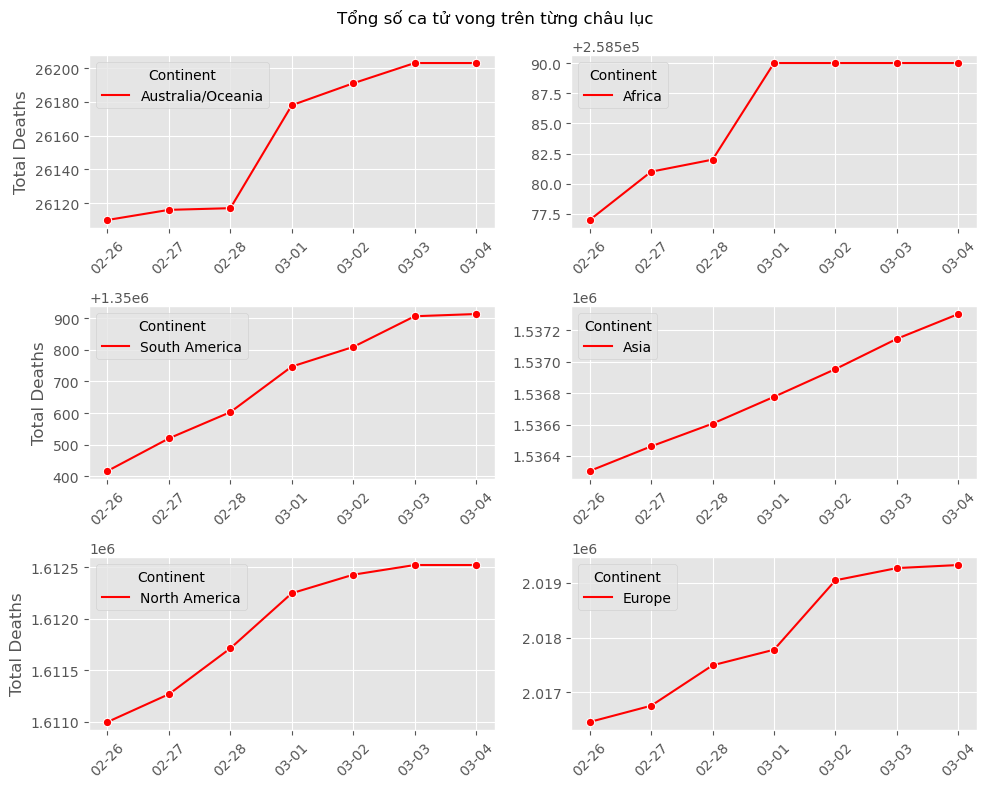

In [9]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

color = sns.color_palette("tab10")
for i, continent in enumerate(continent_df.sort_values('TotalDeaths')['Continent'].unique()):
    ax = fig.add_subplot(3, 2, i + 1)

    sns.lineplot(x='DateCollected', 
                 y='TotalDeaths', 
                 hue='Continent', 
                 data=continent_df[continent_df['Continent'] == continent], 
                 marker="o", 
                 palette=['red'],
                 ax=ax)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(labels=labels, rotation=45)
    
    if (i + 1) % 2 == 0: ax.set(xlabel='', ylabel='')
    else: ax.set(xlabel='', ylabel='Total Deaths')

fig.suptitle('Tổng số ca tử vong trên từng châu lục')
fig.tight_layout()

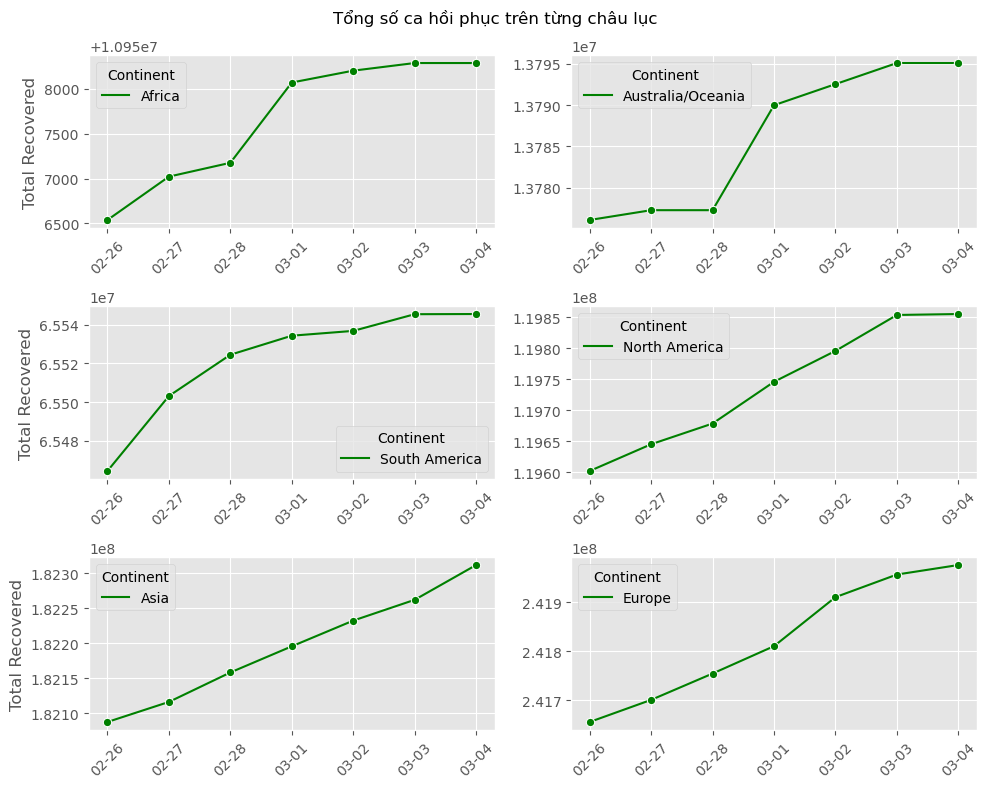

In [10]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

color = sns.color_palette("tab10")
for i, continent in enumerate(continent_df.sort_values('TotalRecovered')['Continent'].unique()):
    ax = fig.add_subplot(3, 2, i + 1)

    sns.lineplot(x='DateCollected', 
                 y='TotalRecovered', 
                 hue='Continent', 
                 data=continent_df[continent_df['Continent'] == continent], 
                 marker="o", 
                 palette=['green'],
                 ax=ax)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(labels=labels, rotation=45)
    
    if (i + 1) % 2 == 0: ax.set(xlabel='', ylabel='')
    else: ax.set(xlabel='', ylabel='Total Recovered')

fig.suptitle('Tổng số ca hồi phục trên từng châu lục')
fig.tight_layout()

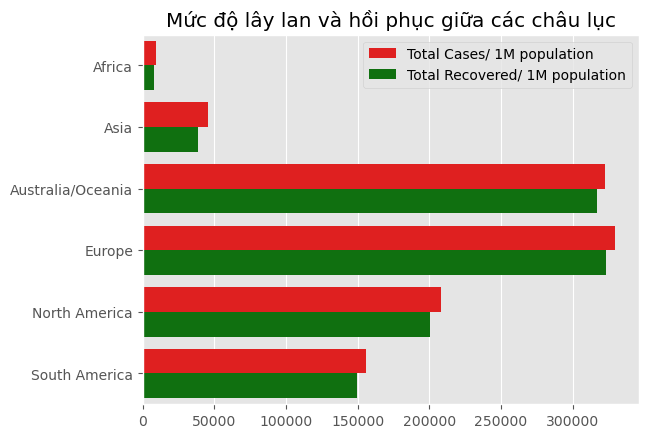

In [11]:
filter_date = continent_df[continent_df['DateCollected'] == continent_df['DateCollected'].max()]
info_continents_df = pd.melt(filter_date, 
                                id_vars=['DateCollected', 'Continent'], 
                                value_vars=['Tot Cases/1M pop', 'TotalRecovered/1M pop'])
    

ax = sns.barplot(x='value', y='Continent', hue='variable', data=info_continents_df, palette=['red', 'green'])

h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Total Cases/ 1M population', 'Total Recovered/ 1M population'])
ax.title.set_text("Mức độ lây lan và hồi phục giữa các châu lục")
ax.set(xlabel='', ylabel='');


Mức độ lây lan giữa châu đại dương và châu Âu là cao nhất.

Mức độ hồi phục nhanh giữa các châu lục